In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [2]:
import os

# Specify the directory you want to list
directory = 'C:/Users/Abdull/Music/machine learning'
files_in_directory = os.listdir(directory)
print(files_in_directory)


['.git', '.vscode', 'project1.ipynb', 'proone_dataset.xlsx', 'README.md', 'venv']


In [3]:
import pandas as pd

# Correct path to the Excel file
file_path = r'C:\Users\Abdull\Music\machine learning\proone_dataset.xlsx'

# Load the dataset from the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print(df.head())


     Person   Age  Weight
0  Person_1  62.0   182.0
1  Person_2  65.0   235.0
2  Person_3  82.0     NaN
3  Person_4  85.0   166.0
4  Person_5  85.0   214.0


In [4]:
# Display the first few rows of the DataFrame
print(df.head())

# Summary statistics for numerical columns
print(df.describe())




     Person   Age  Weight
0  Person_1  62.0   182.0
1  Person_2  65.0   235.0
2  Person_3  82.0     NaN
3  Person_4  85.0   166.0
4  Person_5  85.0   214.0
              Age      Weight
count  450.000000  450.000000
mean    58.808889  178.777778
std     24.063926   43.324789
min     18.000000  100.000000
25%     39.000000  143.250000
50%     59.000000  182.500000
75%     78.000000  215.750000
max    115.000000  249.000000


In [5]:
# Check for missing values in each column
print(df.isnull().sum())

Person     0
Age       50
Weight    50
dtype: int64


In [6]:
import pandas as pd

# Correct path to the dataset
file_path = r'C:\Users\Abdull\Music\machine learning\proone_dataset.xlsx'

# Load the dataset
try:
    df = pd.read_excel(file_path)
    
    # Check for missing values, including any "empty" cells filled with spaces
    df['Age'] = df['Age'].replace(r'^\s*$', None, regex=True)
    df['Weight'] = df['Weight'].replace(r'^\s*$', None, regex=True)

    # Now check for missing values again
    missing_values = df.isnull().sum()

    # Display the missing values per column
    print(missing_values)
    
except FileNotFoundError:
    print(f"File not found: {file_path}")



Person     0
Age       50
Weight    50
dtype: int64


In [7]:
# Calculate the median of numeric columns only
median_values = df.select_dtypes(include=[np.number]).median()

# Fill missing values in these columns with their respective medians
df.fillna(median_values, inplace=True)


In [8]:
print(df.dtypes)


Person     object
Age       float64
Weight    float64
dtype: object


In [9]:
# Calculate median values for numeric columns only
numeric_medians = df.select_dtypes(include=[np.number]).median()

# Fill missing values in numeric columns with their respective medians
df.fillna(numeric_medians, inplace=True)


In [10]:
# For numeric columns, fill missing values with the median
numeric_medians = df.select_dtypes(include=[np.number]).median()
df.fillna(numeric_medians, inplace=True)

# For non-numeric columns, fill missing values with the mode of each column
for column in df.select_dtypes(include=['object']).columns:
    most_common = df[column].mode()[0]
    df[column] = df[column].fillna(most_common)


In [11]:
print(df.isnull().sum())


Person    0
Age       0
Weight    0
dtype: int64


In [12]:
# Summary statistics for numerical columns
print(df.describe())


              Age      Weight
count  500.000000  500.000000
mean    58.828000  179.150000
std     22.826575   41.112126
min     18.000000  100.000000
25%     41.000000  148.000000
50%     59.000000  182.500000
75%     76.000000  212.000000
max    115.000000  249.000000


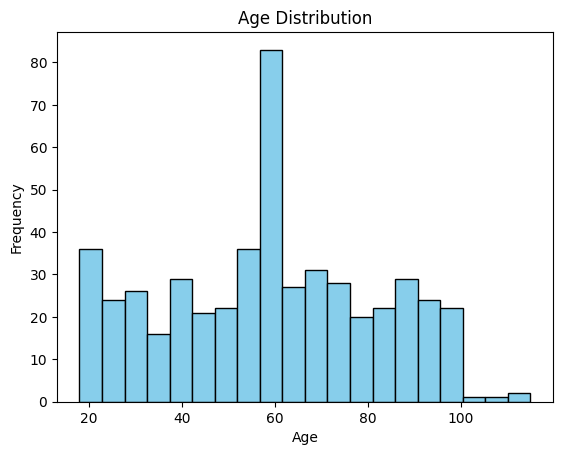

In [13]:
import matplotlib.pyplot as plt

# Histogram for 'Age' column
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


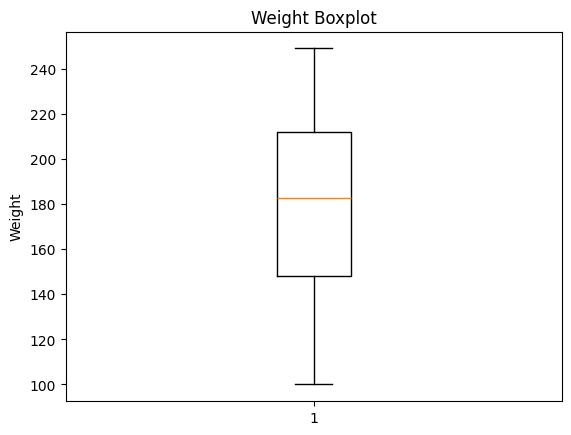

In [14]:
# Boxplot for 'Weight'
plt.boxplot(df['Weight'].dropna())
plt.title('Weight Boxplot')
plt.ylabel('Weight')
plt.show()


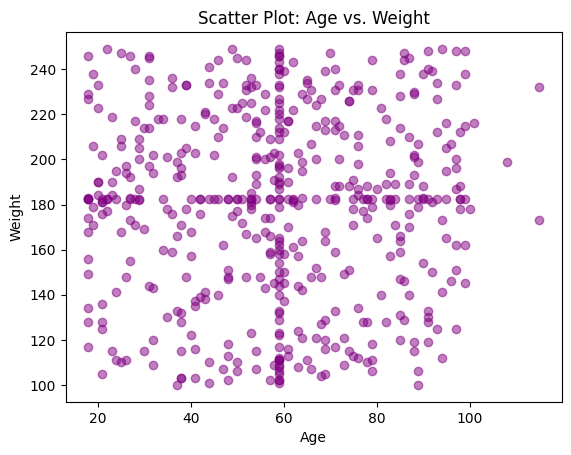

In [15]:
# Scatter plot between 'Age' and 'Weight'
plt.scatter(df['Age'], df['Weight'], color='purple', alpha=0.5)
plt.title('Scatter Plot: Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()


             Age    Weight
Age     1.000000  0.023922
Weight  0.023922  1.000000


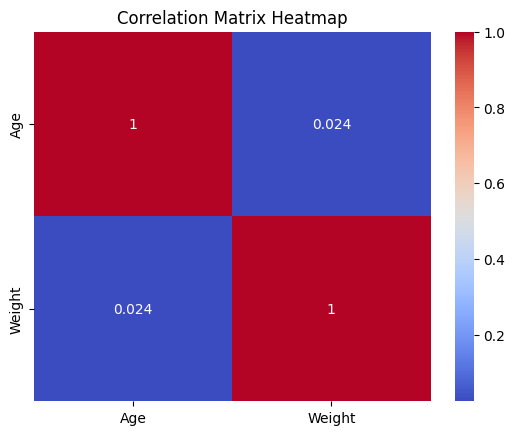

In [16]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
